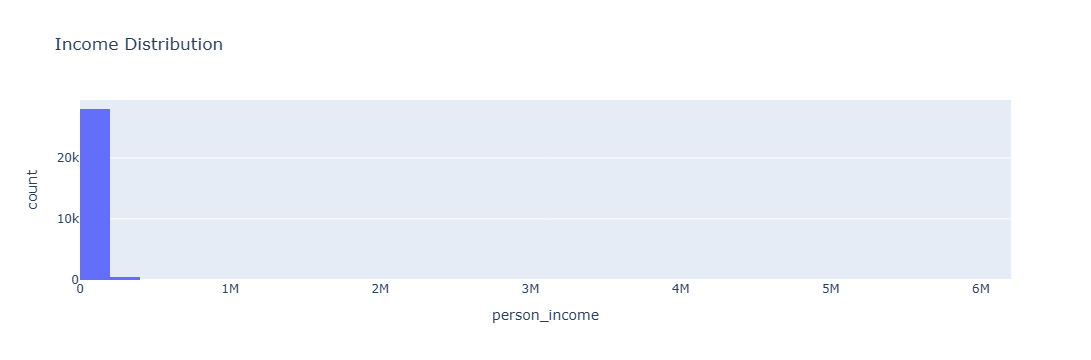

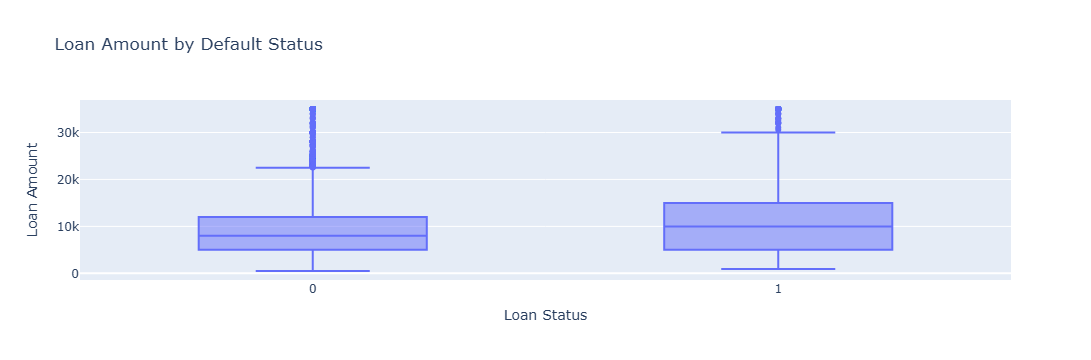

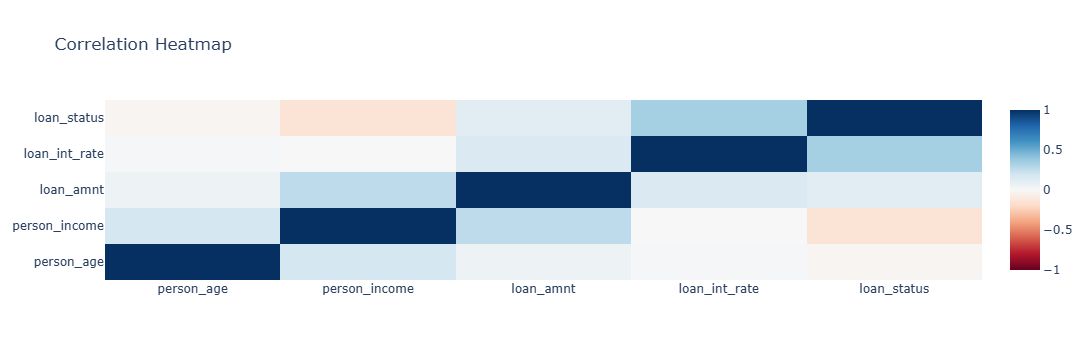

T-test Income Difference → t-stat: -33.01422609156543 p-value: 2.0528879274066102e-232
Accuracy: 0.8195532686235528
Confusion Matrix:
 [[6393  286]
 [1257  615]]


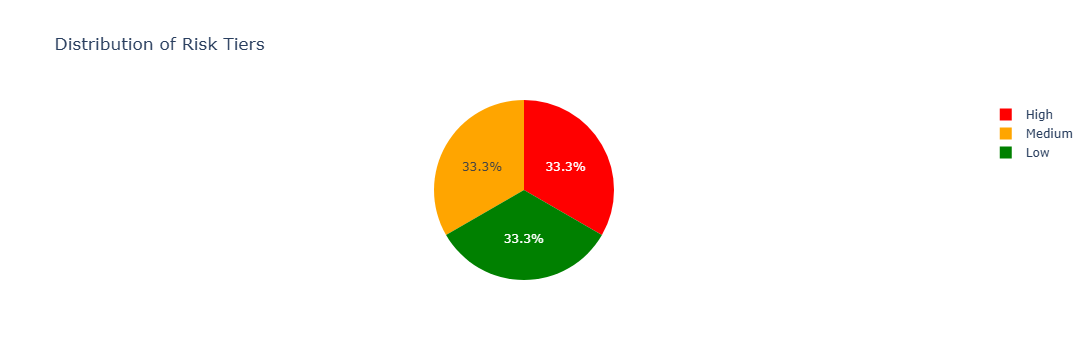

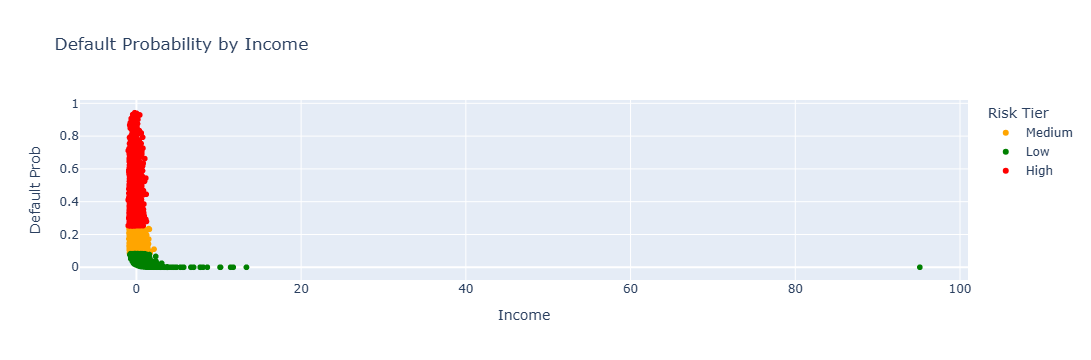

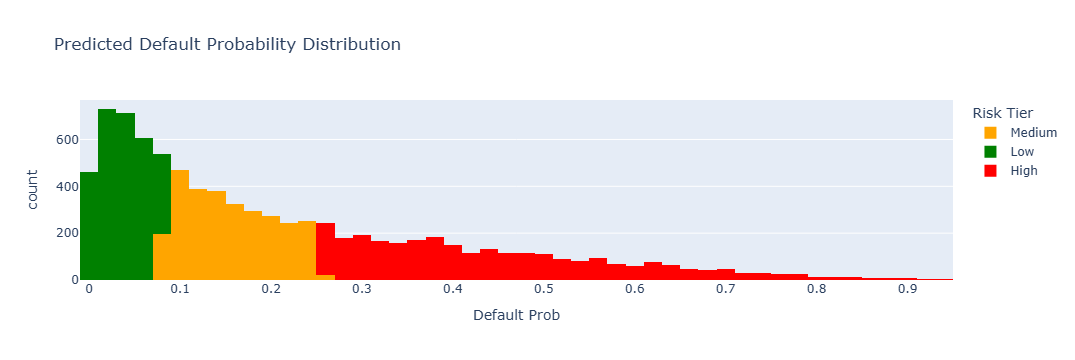

WARNING	Thread(Thread-18 (run)) Task(Task-273) choreographer.browser_async:browser_async.py:_close()- Resorting to unclean kill browser.


✅ Saved as credit_risk_dashboard.png in the notebook folder


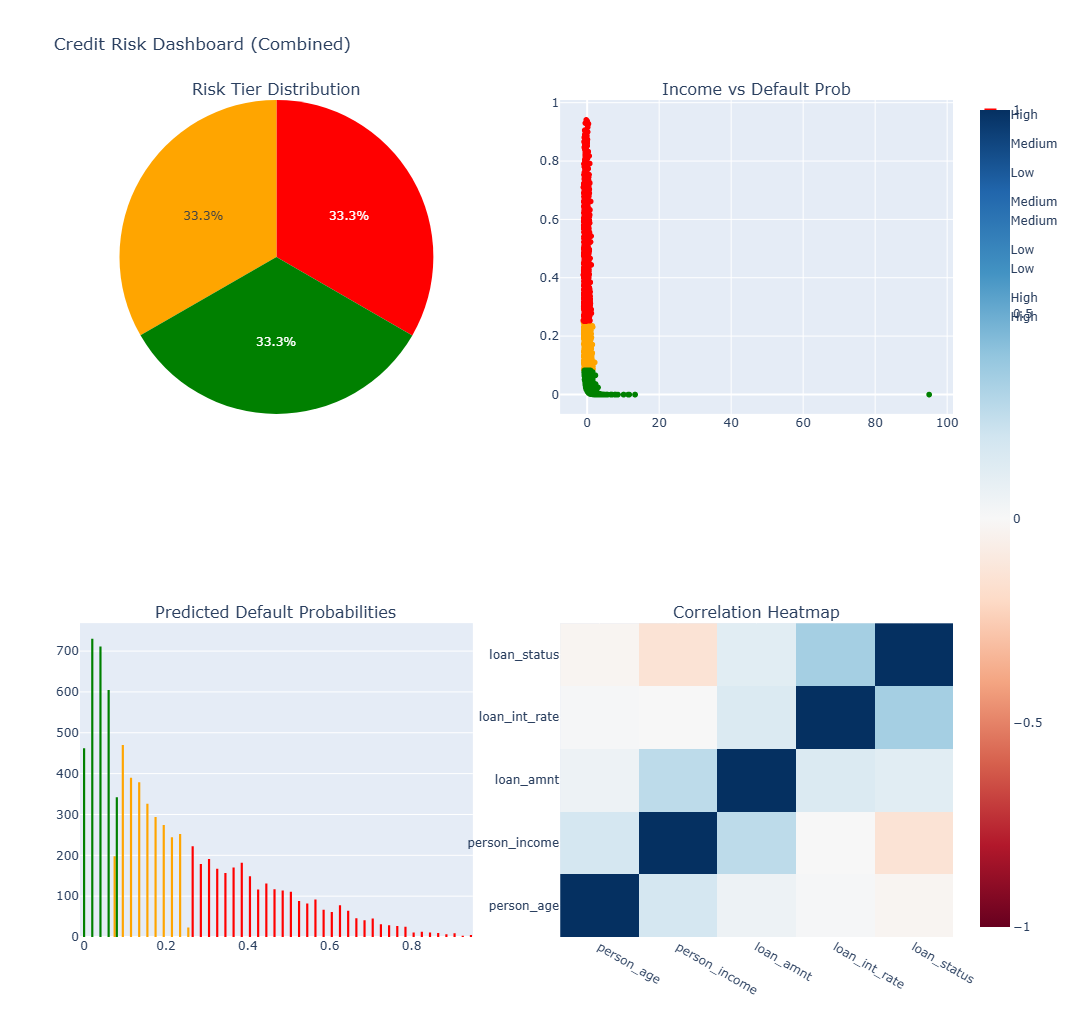

In [11]:
# ===============================
# 1. Setup & Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display

sns.set(style="whitegrid", palette="muted", font_scale=1.2)
plt.rcParams["figure.figsize"] = (10,6)

# ===============================
# 2. Load Data
# ===============================
df = pd.read_csv("../data/credit_risk_dataset.csv")  # path relative to notebooks/
#print(df.head())
#print(df.info())

# ===============================
# 3. Data Cleaning
# ===============================
df = df.drop_duplicates()
df = df.dropna()

# Target variable
df['loan_status'] = df['loan_status'].astype(int)

# ===============================
# 4. Exploratory Data Analysis
# ===============================
# Histogram of income
fig1 = px.histogram(df, x='person_income', nbins=50, title='Income Distribution')
fig1.show()

# Boxplot of loan amount by default status
fig2 = px.box(df, x='loan_status', y='loan_amnt',
              labels={'loan_status':'Loan Status', 'loan_amnt':'Loan Amount'},
              title='Loan Amount by Default Status')
fig2.show()

# Correlation heatmap
corr = df[['person_age','person_income','loan_amnt','loan_int_rate','loan_status']].corr()
fig3 = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1
))
fig3.update_layout(title='Correlation Heatmap')
fig3.show()

# ===============================
# 5. Hypothesis Testing
# ===============================
default_income = df[df['loan_status']==1]['person_income']
nondefault_income = df[df['loan_status']==0]['person_income']
t_stat, p_val = stats.ttest_ind(default_income, nondefault_income, equal_var=False)
print("T-test Income Difference → t-stat:", t_stat, "p-value:", p_val)

# ===============================
# 6. Feature Engineering & Model
# ===============================
X = df[['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']]
y = df['loan_status']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# ===============================
# 7. Interactive Dashboard (Plotly only)
# ===============================

# Prepare dataframe for dashboard
df_dashboard = pd.DataFrame(X_test, columns=['Age','Income','Loan Amount','Interest Rate'])
df_dashboard['Default Prob'] = y_prob
df_dashboard['Actual Status'] = y_test.values

# Assign Risk Tier
df_dashboard['Risk Tier'] = pd.qcut(df_dashboard['Default Prob'], q=3, labels=['Low','Medium','High'])

# --- Pie Chart: Risk Tier Distribution ---
fig_pie = px.pie(df_dashboard, names='Risk Tier', 
                 title='Distribution of Risk Tiers',
                 color='Risk Tier',
                 color_discrete_map={'Low':'green','Medium':'orange','High':'red'})
fig_pie.show()

# --- Scatter Plot: Income vs Default Probability ---
fig_scatter = px.scatter(df_dashboard, x='Income', y='Default Prob', 
                         color='Risk Tier',
                         hover_data=['Age','Loan Amount','Interest Rate','Actual Status'],
                         title='Default Probability by Income',
                         color_discrete_map={'Low':'green','Medium':'orange','High':'red'})
fig_scatter.show()

# --- Histogram: Predicted Default Probabilities ---
fig_hist = px.histogram(df_dashboard, x='Default Prob', nbins=50, 
                        color='Risk Tier', 
                        title='Predicted Default Probability Distribution',
                        color_discrete_map={'Low':'green','Medium':'orange','High':'red'})
fig_hist.show()
from plotly.subplots import make_subplots

from plotly.subplots import make_subplots



In [ ]:

# ===============================
# 8. Combine Charts into One Dashboard Image
# ===============================

# Create subplots: 2 rows, 2 columns
fig_dashboard = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Risk Tier Distribution", "Income vs Default Prob",
                    "Predicted Default Probabilities", "Correlation Heatmap"),
    specs=[[{"type":"domain"}, {"type":"xy"}],
           [{"type":"xy"}, {"type":"heatmap"}]]
)

# --- Pie chart ---
fig_dashboard.add_trace(fig_pie.data[0], row=1, col=1)

# --- Scatter plot ---
for trace in fig_scatter.data:
    fig_dashboard.add_trace(trace, row=1, col=2)

# --- Histogram ---
for trace in fig_hist.data:
    fig_dashboard.add_trace(trace, row=2, col=1)

# --- Heatmap ---
fig_dashboard.add_trace(fig3.data[0], row=2, col=2)

# Layout adjustments
fig_dashboard.update_layout(
    height=1000, width=1200,
    title_text="Credit Risk Dashboard (Combined)"
)

# Show combined dashboard
fig_dashboard.show()